### Make Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# %pip install scikit-learn

In [6]:
# pip install pandas

In [7]:
# pip install matplotlib

In [8]:
# pip install statsmodels

In [9]:
# pip install -q yfinance

In [10]:
import yfinance as yf
from datetime import datetime
# from pandas_datareader.data import DataReader
# from pandas_datareader import data as pdr

### Gather Necessary Data 

In [11]:
downloaded_stock_data = {}
company_ticker = ['AAPL', 'ADBE', 'NVDA', 'MSFT']
company_name = ["APPLE", "ADOBE", "NVIDIA", "MICROSOFT"]
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in company_ticker: 
    downloaded_stock_data[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
downloaded_stock_data

{'AAPL':                   Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272537  \
 2022-06-07  144.350006  149.000000  144.100006  148.710007  147.827286   
 2022-06-08  148.580002  149.869995  147.460007  147.960007  147.081757   
 2022-06-09  147.080002  147.949997  142.529999  142.639999  141.793320   
 2022-06-10  140.279999  140.759995  137.059998  137.130005  136.316025   
 ...                ...         ...         ...         ...         ...   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   
 2023-06-01  177.699997  180.119995  176.929993  180.089996  180.089996   
 2023-06-02  181.029999  181.779999  179.259995  180.949997  180.949997   
 
               

In [13]:
for com_name, com_data in zip(company_name, downloaded_stock_data.items()): 
    com_data[1]["company_name"] = com_name
stock_data = [com_data for com_ticker, com_data in downloaded_stock_data.items()]
stock_data

[                  Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272537  \
 2022-06-07  144.350006  149.000000  144.100006  148.710007  147.827286   
 2022-06-08  148.580002  149.869995  147.460007  147.960007  147.081757   
 2022-06-09  147.080002  147.949997  142.529999  142.639999  141.793320   
 2022-06-10  140.279999  140.759995  137.059998  137.130005  136.316025   
 ...                ...         ...         ...         ...         ...   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   
 2023-06-01  177.699997  180.119995  176.929993  180.089996  180.089996   
 2023-06-02  181.029999  181.779999  179.259995  180.949997  180.949997   
 
               Volume c

In [14]:
AAPL = stock_data[0]
ADBE = stock_data[1]
NVDA = stock_data[2]
MSFT = stock_data[3]

In [15]:
# stock_df = pd.concat(stock_data, axis=0)
stock_df = pd.concat(stock_data, axis=0)
stock_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.272537,71598400,APPLE
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.827286,67808200,APPLE
2022-06-08,148.580002,149.869995,147.460007,147.960007,147.081757,53950200,APPLE
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.793320,69473000,APPLE
2022-06-10,140.279999,140.759995,137.059998,137.130005,136.316025,91437900,APPLE
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.097198,122207100,APPLE
2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971954,84784300,APPLE
2022-06-15,134.289993,137.339996,132.160004,135.429993,134.626114,91533000,APPLE
2022-06-16,132.080002,132.389999,129.039993,130.059998,129.287994,108123900,APPLE


### Analyze Read-In Data

In [16]:
# Summary Statistics 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,151.665441,153.564600,150.055080,151.925920,151.436716,7.388613e+07
std,12.637145,12.414989,12.912570,12.735195,12.808340,2.239948e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,142.699997,144.592503,140.917496,142.912502,142.261520,5.784518e+07
50%,150.180000,152.330002,148.485001,150.795006,150.332176,7.018920e+07
75%,161.235004,162.814995,160.015003,161.899998,161.320263,8.336160e+07
max,181.029999,181.779999,179.259995,180.949997,180.949997,1.647624e+08


In [17]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-06 to 2023-06-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [18]:
# Method: plot_stock_key_figures 
# Parameters: key_figure, key_figure_description 
    # key_figure: The stock attribute you seek to plot 
    # key_figure_description: A short description of the stock attribute for visual aid and descriptive purposes 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the desired key attributes of any of the stocks 
def plot_stock_key_figures(key_figure, key_figure_description): 
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(top=1.75, bottom=1.4)

    for index, com_closing_prices in enumerate(stock_data):
        plt.subplot(2, 2, index+1)
        com_closing_prices[key_figure].plot()
        plt.xlabel('Date')
        plt.ylabel(f'{key_figure_description}')
        plt.grid(linestyle='-', linewidth=1)
        plt.title(f'{list(downloaded_stock_data.keys())[index]} {key_figure_description} By Date')

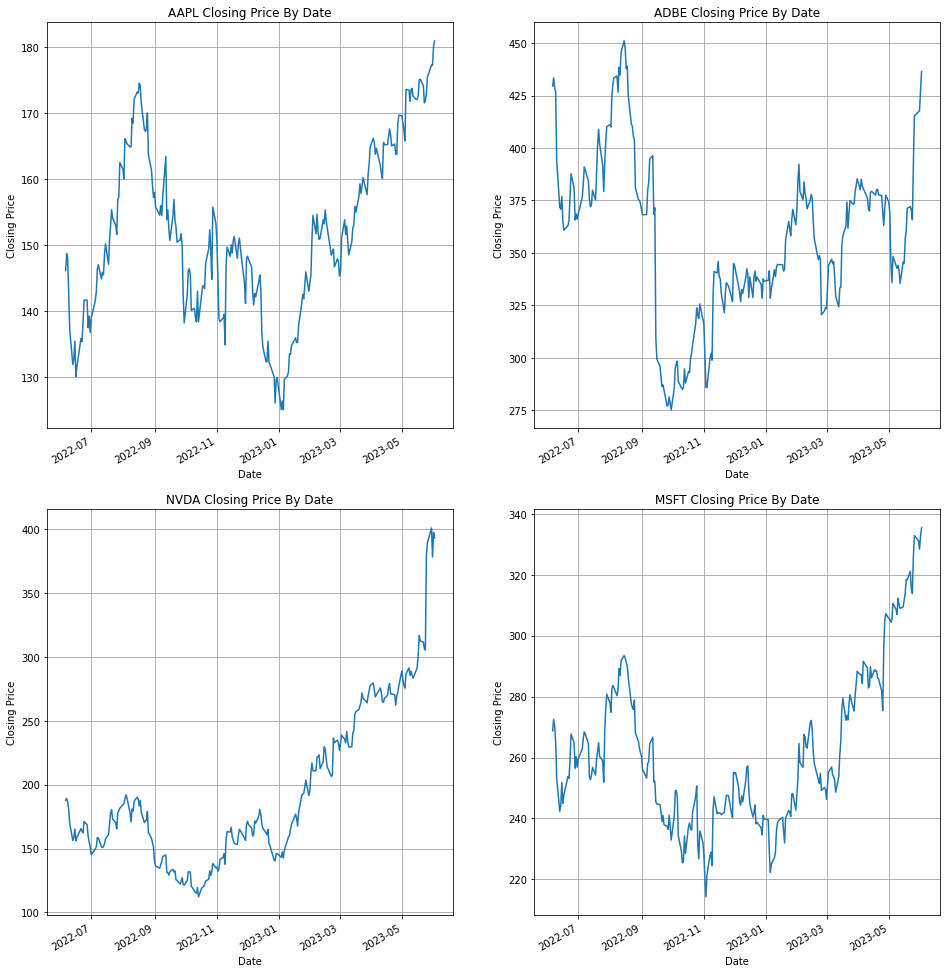

In [19]:
# Plot the non-adjusted closing prices 
plot_stock_key_figures("Close", "Closing Price")

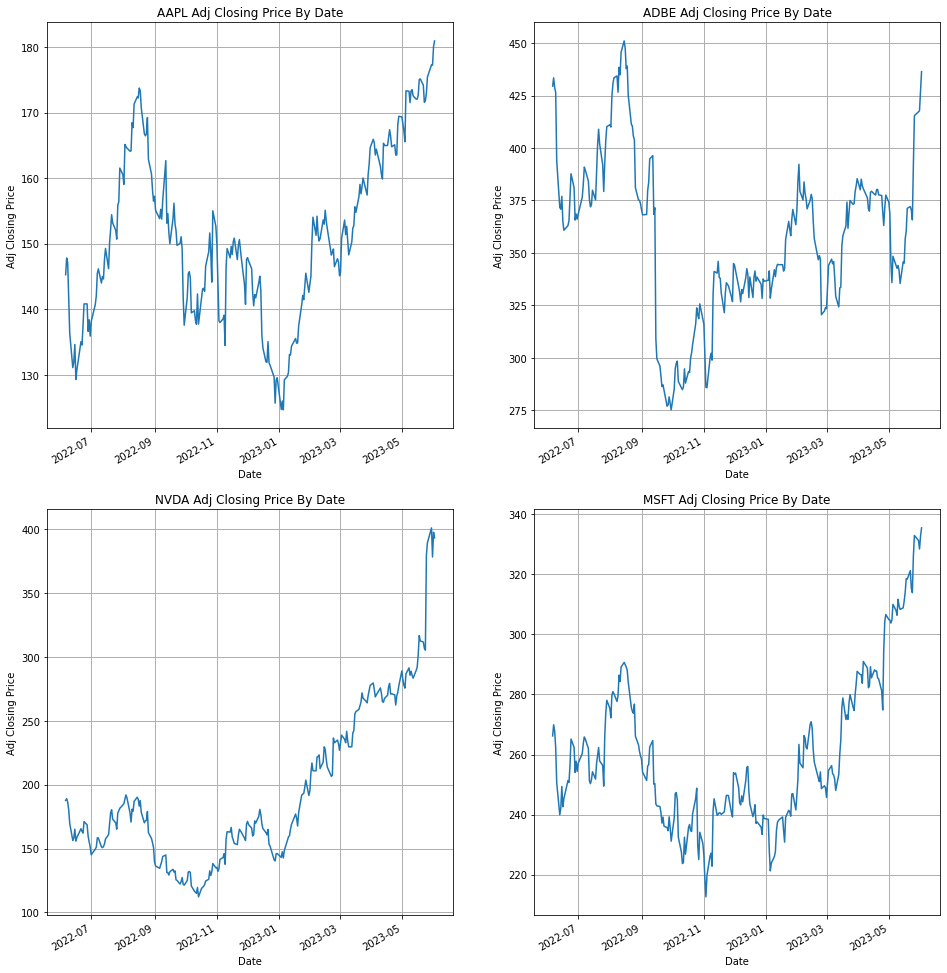

In [20]:
# Plot the adjusted closing prices 
plot_stock_key_figures("Adj Close", "Adj Closing Price")

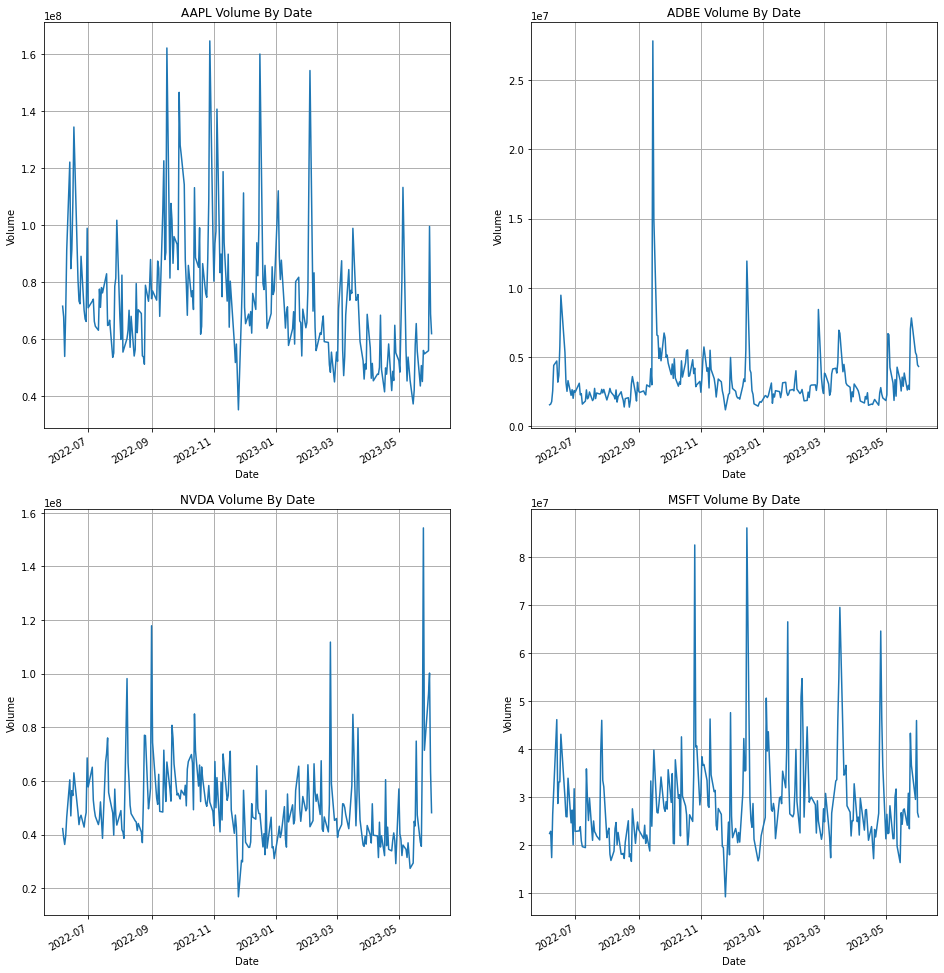

In [21]:
# Plot the volume traded 
plot_stock_key_figures("Volume", "Volume")

In [22]:
# Calculate different moving averages 
moving_average = [10, 14, 20, 50, 100]
for moving_average_days in moving_average: 
    for com_data in stock_data: 
        com_data[f'MA {moving_average_days}'] = com_data['Adj Close'].rolling(moving_average_days).mean()

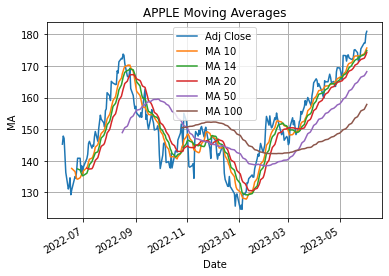

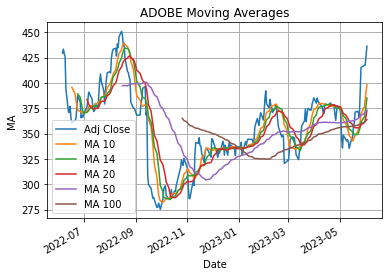

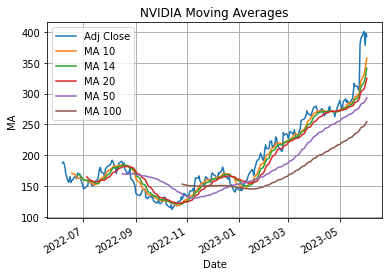

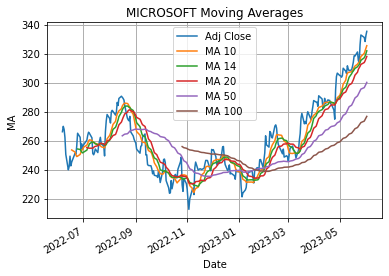

In [23]:
# Method: plot_ma 
# Parameters: com_data
    # com_data: The timeseries data of the desired stock/company 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the different calculcated moving averages for each stock
def plot_ma(com_data): 
    com_data[['Adj Close', 'MA 10', 'MA 14', 'MA 20', 'MA 50', 'MA 100']].plot()
    plt.title(f'{com_data["company_name"][0]} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('MA')
    plt.grid(linestyle='-', linewidth=1)   

for com_data in stock_data: 
    plot_ma(com_data)

In [24]:
# Method: test_time_series_stationarity 
# Parameters: time_series 
    # time_series: The timeseries data of the desired stock/company
# Output: 4 graphs printed with results of the Dickey-Fuller test, no returned output 
# Purpose of function is to perform the Dickey-Fuller test to test the stationarity of the data 
def test_time_series_stationarity(time_series, com_name):
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(time_series, autolag='AIC')
    df_output = pd.Series(df_test[0:3], index=['Test Statistic','p-value',\
                                             '# of Used Observations'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'% key] = value
    print(df_output)

In [25]:
for com_name, com_data in downloaded_stock_data.items():
    print("Company Name: " + com_name)
    test_time_series_stationarity(com_data['Adj Close'], com_name)
    print()

Company Name: AAPL
Results of Dickey-Fuller Test:
Test Statistic           -1.008720
p-value                   0.750070
# of Used Observations    5.000000
Critical Value (1%)      -3.457438
Critical Value (5%)      -2.873459
Critical Value (10%)     -2.573122
dtype: float64

Company Name: ADBE
Results of Dickey-Fuller Test:
Test Statistic           -2.254795
p-value                   0.186962
# of Used Observations    1.000000
Critical Value (1%)      -3.456996
Critical Value (5%)      -2.873266
Critical Value (10%)     -2.573019
dtype: float64

Company Name: NVDA
Results of Dickey-Fuller Test:
Test Statistic            2.470697
p-value                   0.999040
# of Used Observations    3.000000
Critical Value (1%)      -3.457215
Critical Value (5%)      -2.873362
Critical Value (10%)     -2.573070
dtype: float64

Company Name: MSFT
Results of Dickey-Fuller Test:
Test Statistic           -0.100447
p-value                   0.949394
# of Used Observations    2.000000
Critical Value (1

<Figure size 432x288 with 0 Axes>

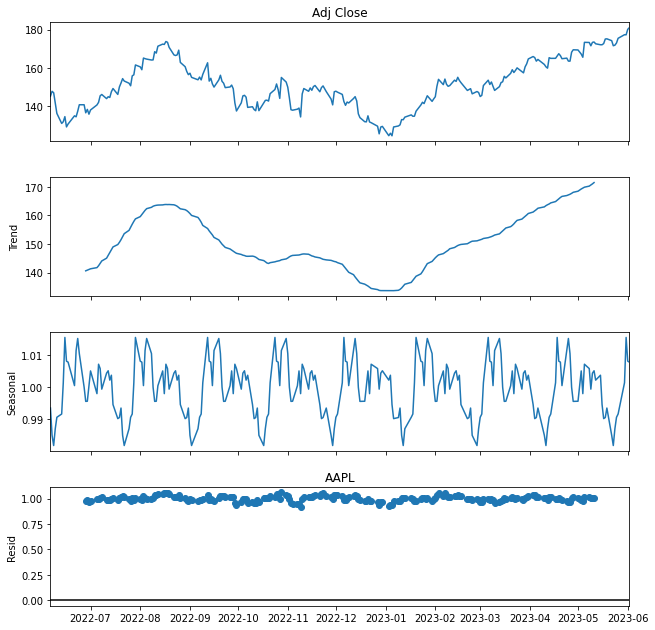

<Figure size 432x288 with 0 Axes>

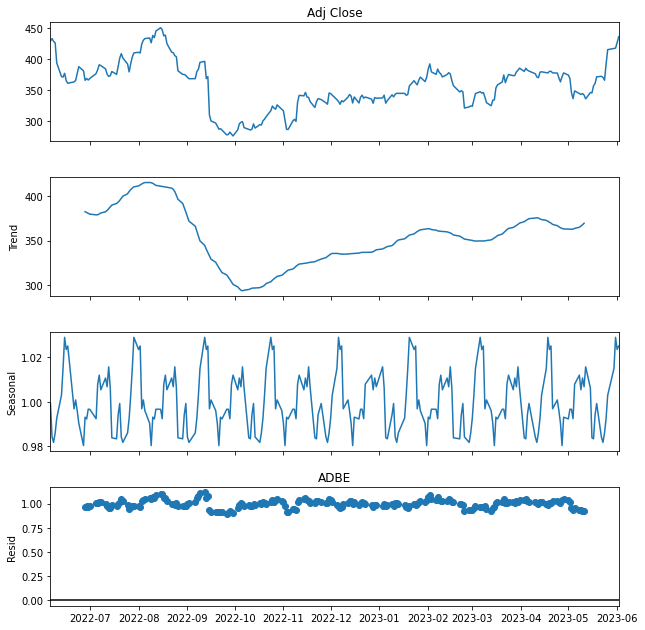

<Figure size 432x288 with 0 Axes>

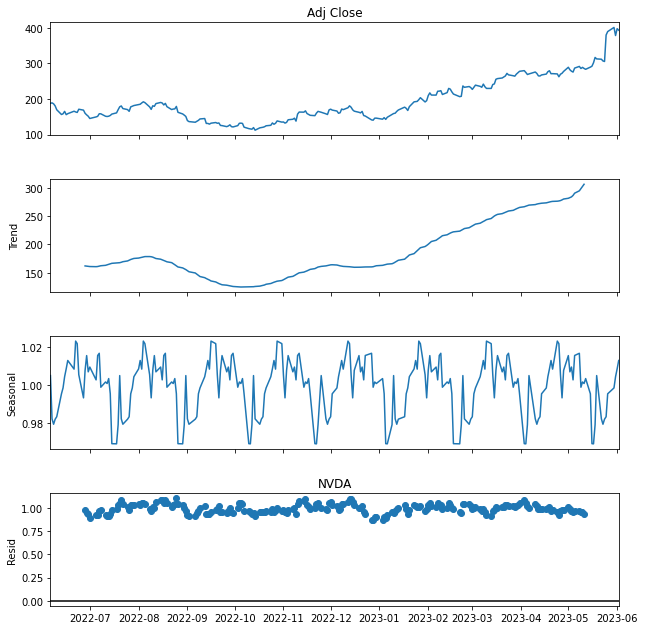

<Figure size 432x288 with 0 Axes>

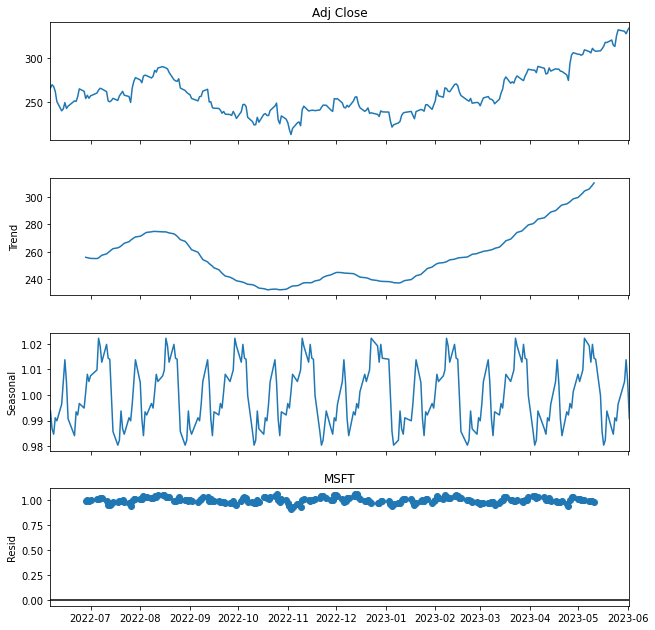

In [26]:
for com_name, com_data in downloaded_stock_data.items():
    result = seasonal_decompose(com_data['Adj Close'], model='multiplicative', period=30)
    fig = plt.figure() 
    fig = result.plot() 
    plt.title(com_name)
    fig.set_size_inches(10, 10)

In [27]:
# Removing trend and seasonality from the time series data for each stock 
AAPL_transformed = []
for com_name, com_data in downloaded_stock_data.items():
    com_data_transformed = com_data['Adj Close'].apply(np.log).apply(np.sqrt)
    com_data_differentiated = com_data_transformed - com_data_transformed.shift()
    com_data_differentiated = com_data_differentiated.dropna()
    print("Company Name: " + com_name)
    test_time_series_stationarity(com_data_differentiated, com_name)
    print()
    if com_name == 'AAPL': 
        AAPL_transformed.append(com_data_transformed)

Company Name: AAPL
Results of Dickey-Fuller Test:
Test Statistic           -7.518957e+00
p-value                   3.836023e-11
# of Used Observations    4.000000e+00
Critical Value (1%)      -3.457438e+00
Critical Value (5%)      -2.873459e+00
Critical Value (10%)     -2.573122e+00
dtype: float64

Company Name: ADBE
Results of Dickey-Fuller Test:
Test Statistic           -1.324693e+01
p-value                   8.935197e-25
# of Used Observations    0.000000e+00
Critical Value (1%)      -3.456996e+00
Critical Value (5%)      -2.873266e+00
Critical Value (10%)     -2.573019e+00
dtype: float64

Company Name: NVDA
Results of Dickey-Fuller Test:
Test Statistic           -1.004027e+01
p-value                   1.502691e-17
# of Used Observations    2.000000e+00
Critical Value (1%)      -3.457215e+00
Critical Value (5%)      -2.873362e+00
Critical Value (10%)     -2.573070e+00
dtype: float64

Company Name: MSFT
Results of Dickey-Fuller Test:
Test Statistic           -1.271486e+01
p-value    

In [28]:
AAPL_transformed

[Date
 2022-06-06    2.231280
 2022-06-07    2.235183
 2022-06-08    2.234052
 2022-06-09    2.225842
 2022-06-10    2.216974
                 ...   
 2023-05-26    2.273156
 2023-05-30    2.275487
 2023-05-31    2.275425
 2023-06-01    2.278916
 2023-06-02    2.279961
 Name: Adj Close, Length: 250, dtype: float64]

### Forecasting 

In [29]:
# # Forecasting AAPL 
# AAPL = stock_data[0]
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_stock_data = scaler.fit_transform(AAPL_transformed)
# print(AAPL_transformed)
# print("Scaled") 
# scaled_stock_data
AAPL_transformed[0][1:10]

Date
2022-06-07    2.235183
2022-06-08    2.234052
2022-06-09    2.225842
2022-06-10    2.216974
2022-06-13    2.208153
2022-06-14    2.209658
2022-06-15    2.214159
2022-06-16    2.205004
2022-06-17    2.207603
Name: Adj Close, dtype: float64

In [30]:
len(AAPL_transformed[0])

250

In [31]:
X, y = [], []
num_days_pred = 30
for index in range(len(AAPL_transformed[0])):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed[0]): 
        X.append(AAPL_transformed[0][index:timestep_index])
        y.append(AAPL_transformed[0][timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [32]:
X[0]

array([2.23128025, 2.23518335, 2.23405206, 2.22584153, 2.21697449,
       2.20815285, 2.20965822, 2.2141593 , 2.20500395, 2.20760264,
       2.21489167, 2.21402588, 2.21884088, 2.22429233, 2.22429233,
       2.21748372, 2.22039944, 2.21629907, 2.21991366, 2.22413357,
       2.22628202, 2.231602  , 2.23265562, 2.22932349, 2.23085046,
       2.23028112, 2.23482202, 2.23736777, 2.23270132, 2.23859918])

In [33]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [34]:
X.shape

(220, 30, 1)

In [35]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [36]:
len(X_train), len(y_train)

(160, 160)

In [37]:
len(X_test), len(y_test)

(60, 60)

In [38]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

2023-06-04 09:54:58.251075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 17ms/step - loss: 4.1942
Epoch 2/15
3/3 [==============================] - 0s 14ms/step - loss: 2.8848
Epoch 3/15
3/3 [==============================] - 0s 15ms/step - loss: 1.7599
Epoch 4/15
3/3 [==============================] - 0s 16ms/step - loss: 0.8473
Epoch 5/15
3/3 [==============================] - 0s 17ms/step - loss: 0.2381
Epoch 6/15
3/3 [==============================] - 0s 15ms/step - loss: 0.0123
Epoch 7/15
3/3 [==============================] - 0s 15ms/step - loss: 0.0775
Epoch 8/15
3/3 [==============================] - 0s 16ms/step - loss: 0.1652
Epoch 9/15
3/3 [==============================] - 0s 17ms/step - loss: 0.1477
Epoch 10/15
3/3 [==============================] - 0s 19ms/step - loss: 0.0787
Epoch 11/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0227
Epoch 12/15
3/3 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 13/15
3/3 [==============================] - 0s 20ms/st

In [40]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 405ms/step - loss: 0.0219


0.021878205239772797

In [41]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 8ms/step


array([[2.1081834],
       [2.108273 ],
       [2.1083066],
       [2.1083646],
       [2.108438 ],
       [2.108521 ],
       [2.1087012],
       [2.1088586],
       [2.1091032],
       [2.1093822]], dtype=float32)

In [42]:
test_original = downloaded_stock_data["AAPL"][-test_days:]

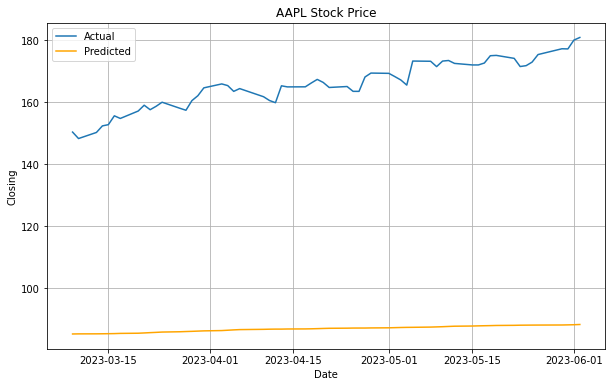

In [43]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)


# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

### Another LSTM Model

In [44]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 31ms/step - loss: 2.4714
Epoch 2/15
5/5 [==============================] - 0s 31ms/step - loss: 0.3535
Epoch 3/15
5/5 [==============================] - 0s 43ms/step - loss: 0.1301
Epoch 4/15
5/5 [==============================] - 0s 37ms/step - loss: 0.0823
Epoch 5/15
5/5 [==============================] - 0s 34ms/step - loss: 0.0438
Epoch 6/15
5/5 [==============================] - 0s 34ms/step - loss: 0.0209
Epoch 7/15
5/5 [==============================] - 0s 35ms/step - loss: 0.0165
Epoch 8/15
5/5 [==============================] - 0s 35ms/step - loss: 0.0087
Epoch 9/15
5/5 [==============================] - 0s 38ms/step - loss: 0.0054
Epoch 10/15
5/5 [==============================] - 0s 35ms/step - loss: 0.0031
Epoch 11/15
5/5 [==============================] - 0s 36ms/step - loss: 0.0023
Epoch 12/15
5/5 [==============================] - 0s 36ms/step - loss: 0.0012
Epoch 13/15
5/5 [==============================] - 0s 35ms/st

In [45]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

2/2 [==============================] - 1s 14ms/step - loss: 8.7672e-04
0.0008767193648964167


In [46]:
# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 12ms/step


In [47]:
y_pred

array([[2.2254448],
       [2.2255504],
       [2.225572 ],
       [2.2256098],
       [2.2257051],
       [2.2258332],
       [2.2260594],
       [2.2262928],
       [2.2265975],
       [2.2269697],
       [2.227316 ],
       [2.2276707],
       [2.2280421],
       [2.2283435],
       [2.2285812],
       [2.2288578],
       [2.2291698],
       [2.2295532],
       [2.2299838],
       [2.2304037],
       [2.2307487],
       [2.231064 ],
       [2.2312667],
       [2.2313712],
       [2.231394 ],
       [2.231519 ],
       [2.2316597],
       [2.2318115],
       [2.2319956],
       [2.2322145],
       [2.2324123],
       [2.2325509],
       [2.2326617],
       [2.2327032],
       [2.2327092],
       [2.2328157],
       [2.2329874],
       [2.2331877],
       [2.2333682],
       [2.2335045],
       [2.2335672],
       [2.2337923],
       [2.234062 ],
       [2.2343109],
       [2.2345884],
       [2.2348628],
       [2.2350986],
       [2.235291 ],
       [2.2354488],
       [2.2355933],


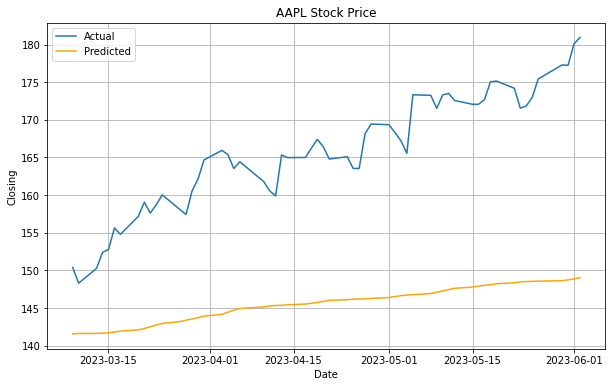

In [48]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [49]:
# Bidirectional LSTM 
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 1s 10ms/step - loss: 3.8347
Epoch 2/15
5/5 [==============================] - 0s 10ms/step - loss: 2.4440
Epoch 3/15
5/5 [==============================] - 0s 10ms/step - loss: 1.1907
Epoch 4/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1922
Epoch 5/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1887
Epoch 6/15
5/5 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 7/15
5/5 [==============================] - 0s 20ms/step - loss: 0.0550
Epoch 8/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0121
Epoch 9/15
5/5 [==============================] - 0s 20ms/step - loss: 0.0127
Epoch 10/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 11/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0046
Epoch 12/15
5/5 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 13/15
5/5 [==============================] - 0s 17ms/st

In [50]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step - loss: 5.2726e-04
0.0005272649577818811
2/2 [==============================] - 0s 14ms/step


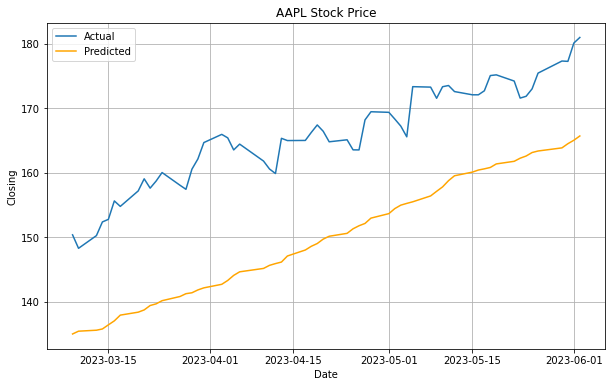

In [51]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [52]:
# Modified Bidirectional LSTM #1
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 1s 10ms/step - loss: 3.1440
Epoch 2/15
5/5 [==============================] - 0s 9ms/step - loss: 1.0554
Epoch 3/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0920
Epoch 4/15
5/5 [==============================] - 0s 10ms/step - loss: 0.2949
Epoch 5/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0472
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 7/15
5/5 [==============================] - 0s 10ms/step - loss: 0.0543
Epoch 8/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 9/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 10/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 11/15
5/5 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 12/15
5/5 [==============================] - 0s 9ms/step - loss: 4.8049e-04
Epoch 13/15
5/5 [==============================] - 0s 9ms/step - l

In [53]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.4993e-04
0.00014992684009484947
2/2 [==============================] - 0s 5ms/step


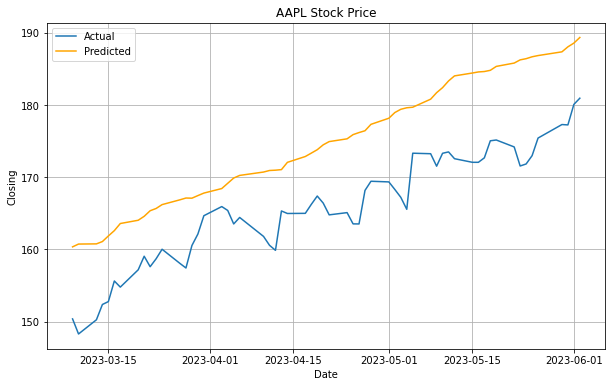

In [54]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [55]:
# Calculate the average difference in % between the original values and the predictions
percent_diff = []
for index in range(len(y_pred)): 
    diff = y_pred[index] - y_test[index]
    val = (diff/y_test[index]) * 100
    percent_diff.append(val)
percent_diff = np.array(percent_diff)
print(percent_diff.mean())

0.5207062


In [56]:
# Modified Bidirectional LSTM #2
model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# model.add(Dense(32))
model.add(Dense(1))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(32))
# model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 4s 41ms/step - loss: 1.8531
Epoch 2/15
5/5 [==============================] - 0s 58ms/step - loss: 0.5656
Epoch 3/15
5/5 [==============================] - 0s 54ms/step - loss: 0.2378
Epoch 4/15
5/5 [==============================] - 0s 50ms/step - loss: 0.2068
Epoch 5/15
5/5 [==============================] - 0s 53ms/step - loss: 0.1244
Epoch 6/15
5/5 [==============================] - 0s 54ms/step - loss: 0.1130
Epoch 7/15
5/5 [==============================] - 0s 52ms/step - loss: 0.0877
Epoch 8/15
5/5 [==============================] - 0s 50ms/step - loss: 0.0811
Epoch 9/15
5/5 [==============================] - 0s 48ms/step - loss: 0.0684
Epoch 10/15
5/5 [==============================] - 0s 49ms/step - loss: 0.0606
Epoch 11/15
5/5 [==============================] - 0s 49ms/step - loss: 0.0551
Epoch 12/15
5/5 [==============================] - 0s 48ms/step - loss: 0.0504
Epoch 13/15
5/5 [==============================] - 0s 47ms/st

In [57]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test, batch_size=64)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0057
0.005730059463530779
2/2 [==============================] - 1s 15ms/step


In [58]:
# The simpler the model in terms of hidden layers, etc., the more likely one is better able to identify the 
# underlying pattern. 

### Repeating Forecasting without Modifying the Data with Respect to the Dickey-Fuller test

In [59]:
AAPL_transformed = AAPL['Adj Close']
AAPL_transformed

Date
2022-06-06    145.272537
2022-06-07    147.827286
2022-06-08    147.081757
2022-06-09    141.793320
2022-06-10    136.316025
                 ...    
2023-05-26    175.429993
2023-05-30    177.300003
2023-05-31    177.250000
2023-06-01    180.089996
2023-06-02    180.949997
Name: Adj Close, Length: 250, dtype: float64

In [60]:
len(AAPL_transformed)

250

In [61]:
X, y = [], []
num_days_pred = 60
for index in range(len(AAPL_transformed)):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed): 
        X.append(AAPL_transformed[index:timestep_index])
        y.append(AAPL_transformed[timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [62]:
X[0]

array([145.27253723, 147.82728577, 147.08175659, 141.7933197 ,
       136.31602478, 131.09719849, 131.97195435, 134.62611389,
       129.28799438, 130.77906799, 135.06350708, 134.54660034,
       137.44926453, 140.81913757, 140.81913757, 136.62419128,
       138.40354919, 135.90846252, 138.10533142, 140.71972656,
       142.07167053, 145.48129272, 146.16719055, 144.0100708 ,
       144.99420166, 144.62640381, 147.5887146 , 149.27862549,
       146.19702148, 150.10368347, 152.1315918 , 154.4278717 ,
       153.175354  , 152.04212952, 150.70016479, 155.85932922,
       156.41601562, 161.54537964, 160.55131531, 159.06021118,
       165.14389038, 164.82579041, 164.59684753, 164.11901855,
       164.16879272, 168.46911621, 167.72253418, 171.31608582,
       172.40112305, 172.24186707, 173.75492859, 173.35673523,
       170.73872375, 166.80673218, 166.46826172, 166.76690674,
       169.25550842, 162.87471008, 160.64491272, 158.18617249])

In [63]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [64]:
X.shape

(190, 60, 1)

In [65]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [66]:
len(X_train), len(y_train)

(130, 130)

In [67]:
len(X_test), len(y_test)

(60, 60)

In [68]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 22ms/step - loss: 21058.4551
Epoch 2/15
3/3 [==============================] - 0s 22ms/step - loss: 21016.7109
Epoch 3/15
3/3 [==============================] - 0s 23ms/step - loss: 20969.5781
Epoch 4/15
3/3 [==============================] - 0s 24ms/step - loss: 20918.4023
Epoch 5/15
3/3 [==============================] - 0s 23ms/step - loss: 20870.3418
Epoch 6/15
3/3 [==============================] - 0s 24ms/step - loss: 20824.6055
Epoch 7/15
3/3 [==============================] - 0s 24ms/step - loss: 20774.3105
Epoch 8/15
3/3 [==============================] - 0s 23ms/step - loss: 20712.2305
Epoch 9/15
3/3 [==============================] - 0s 23ms/step - loss: 20653.0137
Epoch 10/15
3/3 [==============================] - 0s 23ms/step - loss: 20608.5137
Epoch 11/15
3/3 [==============================] - 0s 24ms/step - loss: 20564.6309
Epoch 12/15
3/3 [==============================] - 0s 23ms/step - loss: 20516.0820
Epoch 13/15
3

In [70]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 398ms/step - loss: 26853.9258


26853.92578125

In [71]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 7ms/step


array([[2.1252675],
       [2.1279757],
       [2.1307256],
       [2.128441 ],
       [2.125685 ],
       [2.1250174],
       [2.1215508],
       [2.1223547],
       [2.1196015],
       [2.1172733]], dtype=float32)

In [72]:
test_original = downloaded_stock_data["AAPL"][-test_days:]

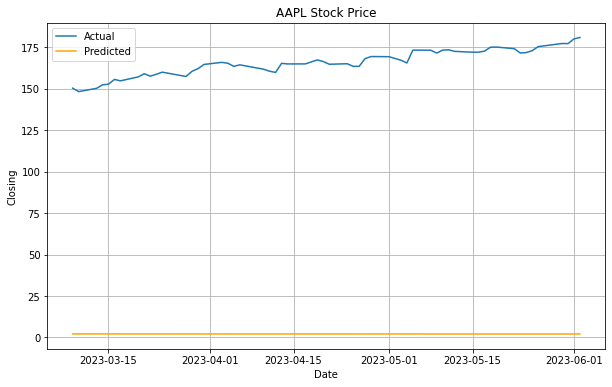

In [73]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [74]:
# Clearly, the data needs to be manipulated so that the neural network can better identify the underlying 
# pattern. 

### Forecasting by Scaling the Raw Data without Modification with Respect to the Dickey-Fuller Test

In [75]:
AAPL_transformed = AAPL[['Adj Close']]
AAPL_transformed

,Adj Close
Date,
2022-06-06,145.272537
2022-06-07,147.827286
2022-06-08,147.081757
2022-06-09,141.793320
2022-06-10,136.316025
...,...
2023-05-26,175.429993
2023-05-30,177.300003
2023-05-31,177.250000


In [76]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_stock_data = scaler.fit_transform(AAPL_transformed)
scaled_stock_data

array([[3.66218790e-01],
       [4.11601831e-01],
       [3.98358108e-01],
       [3.04413305e-01],
       [2.07113591e-01],
       [1.14405364e-01],
       [1.29944694e-01],
       [1.77093691e-01],
       [8.22663168e-02],
       [1.08754033e-01],
       [1.84863628e-01],
       [1.75681198e-01],
       [2.27244679e-01],
       [2.87107747e-01],
       [2.87107747e-01],
       [2.12587920e-01],
       [2.44196774e-01],
       [1.99873578e-01],
       [2.38899176e-01],
       [2.85341791e-01],
       [3.09357982e-01],
       [3.69927162e-01],
       [3.82111582e-01],
       [3.43792095e-01],
       [3.61274383e-01],
       [3.54740752e-01],
       [4.07363807e-01],
       [4.37383707e-01],
       [3.82641505e-01],
       [4.52040194e-01],
       [4.88064345e-01],
       [5.28855900e-01],
       [5.06605937e-01],
       [4.86475120e-01],
       [4.62636203e-01],
       [5.54284585e-01],
       [5.64173669e-01],
       [6.55292671e-01],
       [6.37633922e-01],
       [6.11145664e-01],


In [77]:
len(scaled_stock_data)

250

In [78]:
X, y = [], []
num_days_pred = 60
for index in range(len(scaled_stock_data)):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed): 
        X.append(scaled_stock_data[index:timestep_index])
        y.append(scaled_stock_data[timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [79]:
X[0]

array([[0.36621879],
       [0.41160183],
       [0.39835811],
       [0.3044133 ],
       [0.20711359],
       [0.11440536],
       [0.12994469],
       [0.17709369],
       [0.08226632],
       [0.10875403],
       [0.18486363],
       [0.1756812 ],
       [0.22724468],
       [0.28710775],
       [0.28710775],
       [0.21258792],
       [0.24419677],
       [0.19987358],
       [0.23889918],
       [0.28534179],
       [0.30935798],
       [0.36992716],
       [0.38211158],
       [0.34379209],
       [0.36127438],
       [0.35474075],
       [0.40736381],
       [0.43738371],
       [0.3826415 ],
       [0.45204019],
       [0.48806435],
       [0.5288559 ],
       [0.50660594],
       [0.48647512],
       [0.4626362 ],
       [0.55428459],
       [0.56417367],
       [0.65529267],
       [0.63763392],
       [0.61114566],
       [0.7192173 ],
       [0.71356651],
       [0.70949953],
       [0.70101128],
       [0.70189548],
       [0.77828725],
       [0.76502482],
       [0.828

In [80]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [81]:
X.shape

(190, 60, 1)

In [82]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [83]:
len(X_train), len(y_train)

(130, 130)

In [84]:
len(X_test), len(y_test)

(60, 60)

In [85]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                10400     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 25ms/step - loss: 0.0373
Epoch 2/15
3/3 [==============================] - 0s 20ms/step - loss: 0.0115
Epoch 3/15
3/3 [==============================] - 0s 21ms/step - loss: 0.0169
Epoch 4/15
3/3 [==============================] - 0s 21ms/step - loss: 0.0125
Epoch 5/15
3/3 [==============================] - 0s 20ms/step - loss: 0.0091
Epoch 6/15
3/3 [==============================] - 0s 20ms/step - loss: 0.0104
Epoch 7/15
3/3 [==============================] - 0s 21ms/step - loss: 0.0105
Epoch 8/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0092
Epoch 9/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0082
Epoch 10/15
3/3 [==============================] - 0s 25ms/step - loss: 0.0081
Epoch 11/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0079
Epoch 12/15
3/3 [==============================] - 0s 25ms/step - loss: 0.0076
Epoch 13/15
3/3 [==============================] - 0s 23ms/st

In [87]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 393ms/step - loss: 0.0192


0.019193073734641075

In [88]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 7ms/step


array([[0.4122998 ],
       [0.41503742],
       [0.41293266],
       [0.41403776],
       [0.41905174],
       [0.4246896 ],
       [0.43546644],
       [0.44403955],
       [0.45626527],
       [0.4710391 ]], dtype=float32)

In [89]:
test_original = AAPL_transformed[-test_days:]

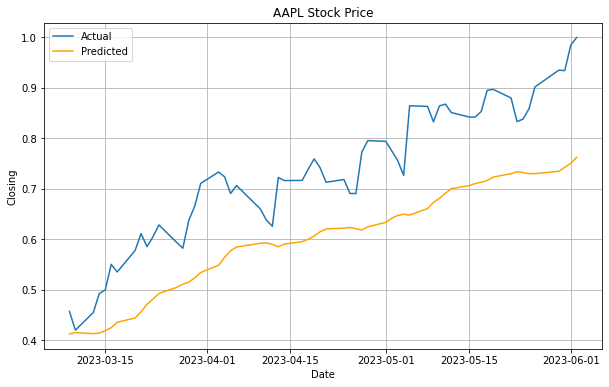

In [90]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [91]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 3s 87ms/step - loss: 0.0793
Epoch 2/15
5/5 [==============================] - 0s 78ms/step - loss: 0.0192
Epoch 3/15
5/5 [==============================] - 0s 80ms/step - loss: 0.0188
Epoch 4/15
5/5 [==============================] - 0s 69ms/step - loss: 0.0114
Epoch 5/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0140
Epoch 6/15
5/5 [==============================] - 0s 79ms/step - loss: 0.0095
Epoch 7/15
5/5 [==============================] - 0s 65ms/step - loss: 0.0097
Epoch 8/15
5/5 [==============================] - 0s 67ms/step - loss: 0.0093
Epoch 9/15
5/5 [==============================] - 0s 73ms/step - loss: 0.0088
Epoch 10/15
5/5 [==============================] - 0s 70ms/step - loss: 0.0095
Epoch 11/15
5/5 [==============================] - 0s 69ms/step - loss: 0.0082
Epoch 12/15
5/5 [==============================] - 0s 65ms/step - loss: 0.0081
Epoch 13/15
5/5 [==============================] - 0s 69ms/st

In [92]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

2/2 [==============================] - 1s 24ms/step - loss: 0.0228
0.022782986983656883


In [93]:
# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 23ms/step


In [94]:
y_pred

array([[0.40526977],
       [0.41200992],
       [0.41523284],
       [0.4177987 ],
       [0.4218412 ],
       [0.42698362],
       [0.43533108],
       [0.44433093],
       [0.45545426],
       [0.46897873],
       [0.48159713],
       [0.49370718],
       [0.5058218 ],
       [0.5150289 ],
       [0.5209619 ],
       [0.52734625],
       [0.53510123],
       [0.5456835 ],
       [0.55855674],
       [0.571383  ],
       [0.58129144],
       [0.5893482 ],
       [0.59291196],
       [0.59200794],
       [0.58751696],
       [0.5864005 ],
       [0.5872357 ],
       [0.5893367 ],
       [0.59331226],
       [0.5993216 ],
       [0.6052025 ],
       [0.608904  ],
       [0.61115557],
       [0.6107058 ],
       [0.60849696],
       [0.60987854],
       [0.61475503],
       [0.62148046],
       [0.6278543 ],
       [0.63240045],
       [0.6337257 ],
       [0.64046586],
       [0.6501258 ],
       [0.65928125],
       [0.66913265],
       [0.6788102 ],
       [0.6866754 ],
       [0.692

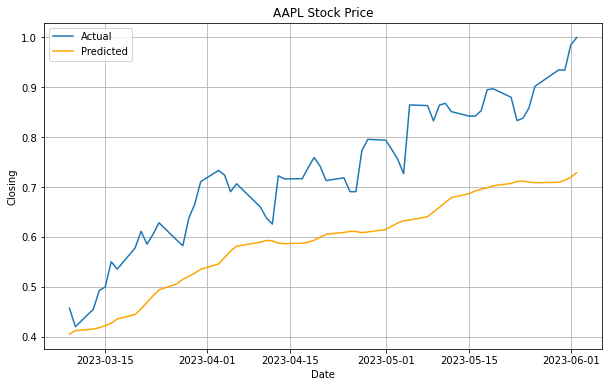

In [95]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [96]:
# Bidirectional LSTM 
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 22ms/step - loss: 0.0796
Epoch 2/15
5/5 [==============================] - 0s 23ms/step - loss: 0.0418
Epoch 3/15
5/5 [==============================] - 0s 25ms/step - loss: 0.0179
Epoch 4/15
5/5 [==============================] - 0s 41ms/step - loss: 0.0182
Epoch 5/15
5/5 [==============================] - 0s 36ms/step - loss: 0.0185
Epoch 6/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0137
Epoch 7/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0133
Epoch 8/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0127
Epoch 9/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0110
Epoch 10/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0107
Epoch 11/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0101
Epoch 12/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0097
Epoch 13/15
5/5 [==============================] - 0s 29ms/st

In [97]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0204
0.02040228433907032
2/2 [==============================] - 0s 8ms/step


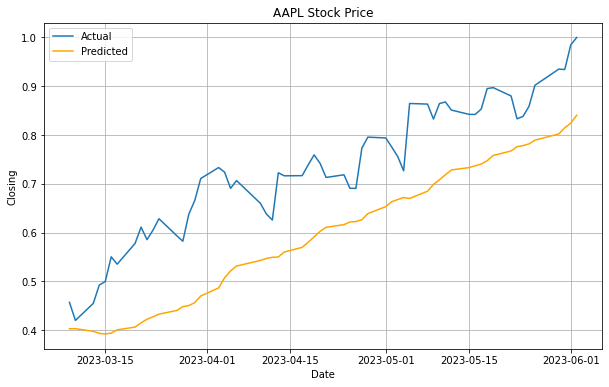

In [98]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [99]:
# Modified Bidirectional LSTM #1
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 23ms/step - loss: 0.0965
Epoch 2/15
5/5 [==============================] - 0s 24ms/step - loss: 0.0327
Epoch 3/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0116
Epoch 4/15
5/5 [==============================] - 0s 33ms/step - loss: 0.0163
Epoch 5/15
5/5 [==============================] - 0s 34ms/step - loss: 0.0133
Epoch 6/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0099
Epoch 7/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0107
Epoch 8/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0103
Epoch 9/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0091
Epoch 10/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0088
Epoch 11/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0086
Epoch 12/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0081
Epoch 13/15
5/5 [==============================] - 0s 28ms/st

In [100]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0228
0.02280249632894993
2/2 [==============================] - 0s 10ms/step


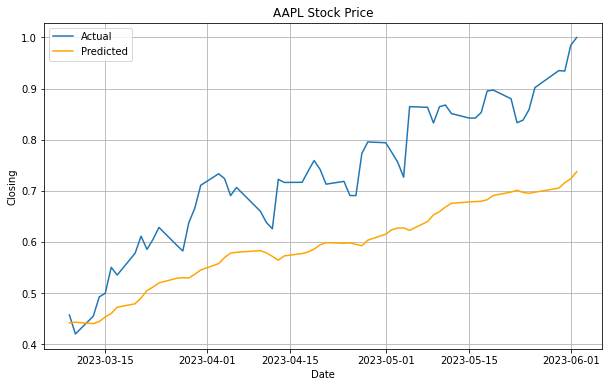

In [101]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [102]:
# Modified Bidirectional LSTM #2
model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
# model.add(Dense(1))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(32))
# model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 5s 76ms/step - loss: 0.0775
Epoch 2/15
5/5 [==============================] - 0s 101ms/step - loss: 0.0398
Epoch 3/15
5/5 [==============================] - 0s 94ms/step - loss: 0.0343
Epoch 4/15
5/5 [==============================] - 0s 92ms/step - loss: 0.0296
Epoch 5/15
5/5 [==============================] - 0s 95ms/step - loss: 0.0290
Epoch 6/15
5/5 [==============================] - 1s 102ms/step - loss: 0.0271
Epoch 7/15
5/5 [==============================] - 1s 107ms/step - loss: 0.0287
Epoch 8/15
5/5 [==============================] - 0s 88ms/step - loss: 0.0255
Epoch 9/15
5/5 [==============================] - 0s 89ms/step - loss: 0.0244
Epoch 10/15
5/5 [==============================] - 0s 94ms/step - loss: 0.0238
Epoch 11/15
5/5 [==============================] - 0s 90ms/step - loss: 0.0232
Epoch 12/15
5/5 [==============================] - 0s 90ms/step - loss: 0.0229
Epoch 13/15
5/5 [==============================] - 1s 103m

In [103]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test, batch_size=64)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step - loss: 0.1586
0.15858905017375946
2/2 [==============================] - 1s 28ms/step


In [104]:
# Best average difference in % between the original values and the predictions: 0.5207062% (i.e. percent_diff.mean())
# The predictions, via that LSTM, were on average 0.5207062% higher than the original/actual values 

In [105]:
# Ways to improve upon the current models: 
    # Conduct further research on LSTM models to better understand ways to tune the model without heavily risking 
    # overfitting. 
        # Experimenting with more LSTM models (different # of layers, etc.)
        # Experiment with different neural networks such as CNNs, etc. 
    # Research other ways to better massage the data that is fed into the model
        # Part of this step involves learning more EDA techniques to better understand the nature of the data 